In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
water = pd.read_csv('C:/Projects/Netology/Homeworks/water.csv')
water.head(15)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


График зависимости жесткости воды и смертности

<AxesSubplot:title={'center':'Water hardness impact for mortality'}, xlabel='hardness', ylabel='mortality'>

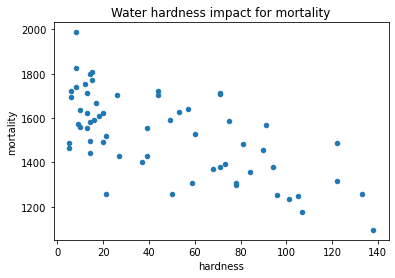

In [3]:
water.plot(kind= 'scatter', x = 'hardness',  y = 'mortality',
                             title= 'Water hardness impact for mortality',
                             xlabel= 'Hardness level',
                             ylabel= 'Mortality level')

# Считаем коэфицент корреляции Пирсона 


In [4]:
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


# Считаем коэфицент корреляции Спирмана 

In [5]:
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Из графика и коэффицинетов корреляции видна обратная зависимость. То есть, чем выше жесткость - тем ниже смертность

# Построим модель линейной регрессии

In [6]:
x = water[['hardness']]
y = water['mortality']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [7]:
x_train.shape

(42, 1)

In [8]:
y_train.shape

(42,)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.coef_

array([-3.13167087])

In [11]:
model.intercept_

1668.9722977277095

In [12]:
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

Сравним прогнозы

In [13]:
result_water = x_test.copy()
result_water['y_pred'] = y_pred
result_water['y_test'] = y_test
result_water['difference'] = y_test - y_pred
result_water.head()

,hardness,y_pred,y_test,difference
0,105,1340.146856,1247,-93.146856
5,10,1637.655589,1558,-79.655589
46,14,1625.128906,1495,-130.128906
31,44,1531.178779,1702,170.821221
13,78,1424.701970,1307,-117.701970


Рассчитаем коэффициент детерминации

In [14]:
model.score(x_test, y_test)

0.5046490611017092

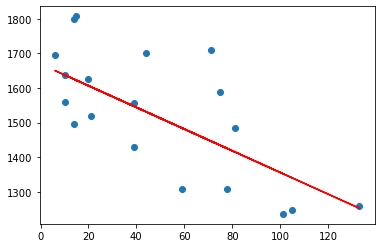

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

# График остатков

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [18]:
x_const = sm.add_constant(x_train)

In [19]:
x_const.shape

(36, 2)

In [20]:
model = sm.OLS(y_train, x_const)
results = model.fit()

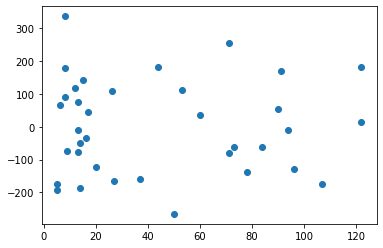

In [21]:
plt.scatter(x_const.iloc[:, 1], results.resid)

# Задание 2

North

In [22]:
north_region = water.loc[ water['location'] == 'North']
north_region.head(5)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:title={'center':'Water hardness impact for mortality'}, xlabel='hardness', ylabel='mortality'>

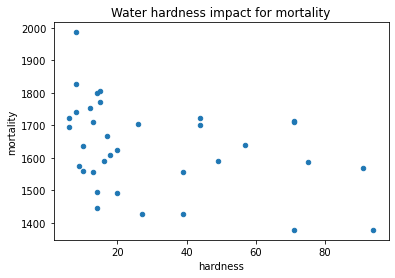

In [23]:
north_region.plot(kind= 'scatter', x = 'hardness',  y = 'mortality',
                             title= 'Water hardness impact for mortality',
                             xlabel= 'Hardness level',
                             ylabel= 'Mortality level')

In [24]:
north_region[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [25]:
north_region[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [26]:
x_north = north_region[['hardness']]
y_north = north_region['mortality']


x_north_train, x_north_test, y_north_train, y_north_test = train_test_split(x_north, y_north, test_size=0.30, random_state=42)

In [27]:
x_north_train.shape

(24, 1)

In [28]:
y_north_train.shape

(24,)

In [29]:
north = LinearRegression()
north.fit(x_north_train, y_north_train)

LinearRegression()

In [30]:
north.coef_

array([-1.97686226])

In [31]:
north.intercept_

1688.150229031281

In [32]:
y_pred_north = north.predict(x_north_test)
y_pred_north

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [33]:
result_north = x_north_test.copy()
result_north['y_pred'] = y_pred_north
result_north['y_test'] = y_north_test
result_north['difference'] = y_north_test - y_pred_north
result_north.head()

,hardness,y_pred,y_test,difference
45,8,1672.335331,1987,314.664669
23,9,1670.358469,1574,-96.358469
43,14,1660.474157,1444,-216.474157
36,6,1676.289055,1724,47.710945
26,16,1656.520433,1591,-65.520433


In [34]:
north.score(x_north_test, y_north_test)

0.018885304285745863

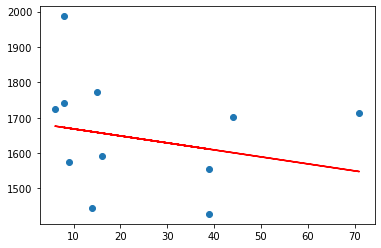

In [35]:
plt.scatter(x_north_test, y_north_test)
plt.plot(x_north_test, y_pred_north, c='r')

In [66]:
x_north_train, x_north_test, y_north_train, y_north_test = train_test_split(x_north, y_north, test_size=0.30,\
                                                                            random_state=42)

In [67]:
x_north_const = sm.add_constant(x_north_train)

In [68]:
x_north_const.shape

(24, 2)

In [69]:
model_north = sm.OLS(y_north_train, x_north_const)
results_north = model_north.fit()

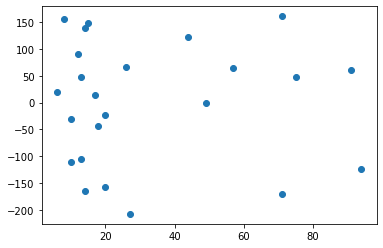

In [71]:
plt.scatter(x_north_const.iloc[:, 1], results_north.resid)

South

In [41]:
south_region = water.loc[ water['location'] == 'South']
south_region.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:title={'center':'Water hardness impact for mortality'}, xlabel='hardness', ylabel='mortality'>

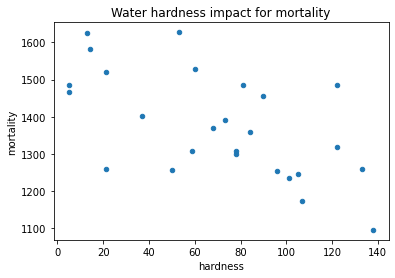

In [42]:
south_region.plot(kind= 'scatter', x = 'hardness',  y = 'mortality',
                             title= 'Water hardness impact for mortality',
                             xlabel= 'Hardness level',
                             ylabel= 'Mortality level')

In [43]:
south_region[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [44]:
south_region[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [45]:
x_south = south_region[['hardness']]
y_south = south_region['mortality']


x_south_train, x_south_test, y_south_train, y_south_test = train_test_split(x_south, y_south, test_size=0.30, random_state=42)

In [46]:
x_south_train.shape

(18, 1)

In [47]:
y_south_train.shape

(18,)

In [48]:
south = LinearRegression()
south.fit(x_south_train, y_south_train)

LinearRegression()

In [49]:
south.coef_

array([-3.51342921])

In [50]:
south.intercept_

1640.2204603423374

In [51]:
y_pred_south = south.predict(x_south_test)
y_pred_south

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [52]:
result_south = x_south_test.copy()
result_south['y_pred'] = y_pred_south
result_south['y_test'] = y_south_test
result_south['difference'] = y_south_test - y_pred_south
result_south.head()

,hardness,y_pred,y_test,difference
18,122,1211.582096,1318,106.417904
38,5,1622.653314,1486,-136.653314
0,105,1271.310393,1247,-24.310393
58,122,1211.582096,1486,274.417904
27,37,1510.223579,1402,-108.223579


In [54]:
south.score(x_south_test, y_south_test)

-2.551922301235205

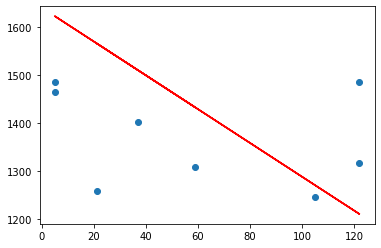

In [55]:
plt.scatter(x_south_test, y_south_test)
plt.plot(x_south_test, y_pred_south, c='r')

In [60]:
x_south_train, x_south_test, y_south_train, y_south_test = train_test_split(x_south, y_south, test_size=0.30,\
                                                                            random_state=42)

In [61]:
x_south_const = sm.add_constant(x_south_train)

In [62]:
x_south_const.shape

(18, 2)

In [64]:
model_south = sm.OLS(y_south_train, x_south_const)
results_south = model_south.fit()

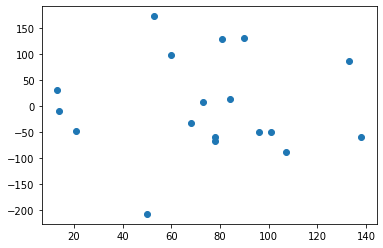

In [65]:
plt.scatter(x_south_const.iloc[:, 1], results_south.resid)